In [1]:
# Dependencies and Setup
import requests
import time
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
# Summary database
# base_url = 'https://api.opencovid.ca/timeseries'
# response = requests.get(base_url).json()
# pprint(response)

In [3]:
# response['data']['tests_completed']
# print(response.keys())
# print(response['data']['hospitalizations'][0]['region'])
# print(response['data']['deaths'][0]['value'])
# print(response['data']['deaths'][0]['value_daily'])

In [4]:
# Summary database
# base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
# response = requests.get(base_url).json()

In [5]:
# response['data']

# Fetching the data from API

In [6]:
base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
response = requests.get(base_url).json()
provinces = []
for province in response['data']:
    provinces.append(province['region'])
print(provinces)   

['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


In [7]:
# Set the base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_confirmed_cases_response = requests.get(covid_url).json()
# Define an empty list to fetch the covid confirmed cases
covid_cases_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_confirmed_cases_response['data']['cases']:
    covid_cases_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative confirmed cases": case['value'], "Confirmed cases per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [8]:
covid_confirmed_cases_data_df = pd.DataFrame(covid_cases_data)
# Show Record Count
covid_confirmed_cases_data_df

Province        Date  Cumulative confirmed cases  \
0           AB  2020-03-05                           1   
1           AB  2020-03-06                           1   
2           AB  2020-03-07                           2   
3           AB  2020-03-08                           3   
4           AB  2020-03-09                           7   
...        ...         ...                         ...   
14005       YT  2022-11-06                        5578   
14006       YT  2022-11-07                        5581   
14007       YT  2022-11-08                        5582   
14008       YT  2022-11-09                        5582   
14009       YT  2022-11-10                        5588   

       Confirmed cases per day  
0                            1  
1                            0  
2                            1  
3                            1  
4                            4  
...                        ...  
14005                        5  
14006                        3  
14007                        1  
14008                        0  
14009                        6  

[14010 rows x 4 columns]

In [9]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_deaths_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
covid_death_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_deaths_response['data']['deaths']:
    covid_death_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative death cases": case['value'], "Deaths per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [10]:
death_data_df = pd.DataFrame(covid_death_data)
death_data_df

Province        Date  Cumulative death cases  Deaths per day
0           AB  2020-03-08                       0               0
1           AB  2020-03-09                       0               0
2           AB  2020-03-10                       0               0
3           AB  2020-03-11                       0               0
4           AB  2020-03-12                       0               0
...        ...         ...                     ...             ...
13907       YT  2022-11-01                      32               0
13908       YT  2022-11-02                      32               0
13909       YT  2022-11-03                      32               0
13910       YT  2022-11-04                      32               0
13911       YT  2022-11-05                      32               0

[13912 rows x 4 columns]

In [11]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_hospitalization_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
hospitalization_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_hospitalization_response['data']['hospitalizations']:
    hospitalization_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative hospitalizations cases": case['value'], "hospitalizations per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [12]:
hospitalization_data_df = pd.DataFrame(hospitalization_data)
hospitalization_data_df

Province        Date  Cumulative hospitalizations cases  \
0           AB  2020-01-25                                  0   
1           AB  2020-01-26                                  0   
2           AB  2020-01-27                                  0   
3           AB  2020-01-28                                  0   
4           AB  2020-01-29                                  0   
...        ...         ...                                ...   
13781       YT  2022-11-13                                  0   
13782       YT  2022-11-14                                  0   
13783       YT  2022-11-15                                  0   
13784       YT  2022-11-16                                  0   
13785       YT  2022-11-17                                  0   

       hospitalizations per day  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
...                         ...  
13781                         0  
13782                         0  
13783                         0  
13784                         0  
13785                         0  

[13786 rows x 4 columns]

In [13]:
# Mering the three DataFrames named as covid_confirmed_cases_data_df, death_data_df and hospitalization_data_df on columns Province and Date as they are common columns in all of the dataframes
covid_combined_df = pd.merge(covid_confirmed_cases_data_df, pd.merge(death_data_df, hospitalization_data_df, on=['Province', 'Date']), on=['Province', 'Date'])
covid_combined_df

Province        Date  Cumulative confirmed cases  \
0           AB  2020-03-08                           3   
1           AB  2020-03-09                           7   
2           AB  2020-03-10                          16   
3           AB  2020-03-11                          23   
4           AB  2020-03-12                          26   
...        ...         ...                         ...   
13047       YT  2022-11-01                        5556   
13048       YT  2022-11-02                        5560   
13049       YT  2022-11-03                        5564   
13050       YT  2022-11-04                        5566   
13051       YT  2022-11-05                        5573   

       Confirmed cases per day  Cumulative death cases  Deaths per day  \
0                            1                       0               0   
1                            4                       0               0   
2                            9                       0               0   
3                            7                       0               0   
4                            3                       0               0   
...                        ...                     ...             ...   
13047                        3                      32               0   
13048                        4                      32               0   
13049                        4                      32               0   
13050                        2                      32               0   
13051                        7                      32               0   

       Cumulative hospitalizations cases  hospitalizations per day  
0                                      0                         0  
1                                      4                         4  
2                                      5                         1  
3                                      5                         0  
4                                      5                         0  
...                                  ...                       ...  
13047                                  0                         0  
13048                                  0                         0  
13049                                  0                         0  
13050                                  0                         0  
13051                                  0                         0  

[13052 rows x 8 columns]

In [14]:
covid_combined_final_df = covid_combined_df[(covid_combined_df['Cumulative confirmed cases'] >= 0) & (covid_combined_df['Confirmed cases per day'] >= 0) & (covid_combined_df['Cumulative death cases'] >= 0) & (covid_combined_df['Deaths per day'] >= 0) & (covid_combined_df['Cumulative hospitalizations cases'] >= 0)& (covid_combined_df['hospitalizations per day'] >= 0)]
covid_combined_final_df = covid_combined_final_df.dropna()
covid_combined_final_df

Province        Date  Cumulative confirmed cases  \
0           AB  2020-03-08                           3   
1           AB  2020-03-09                           7   
2           AB  2020-03-10                          16   
3           AB  2020-03-11                          23   
4           AB  2020-03-12                          26   
...        ...         ...                         ...   
13047       YT  2022-11-01                        5556   
13048       YT  2022-11-02                        5560   
13049       YT  2022-11-03                        5564   
13050       YT  2022-11-04                        5566   
13051       YT  2022-11-05                        5573   

       Confirmed cases per day  Cumulative death cases  Deaths per day  \
0                            1                       0               0   
1                            4                       0               0   
2                            9                       0               0   
3                            7                       0               0   
4                            3                       0               0   
...                        ...                     ...             ...   
13047                        3                      32               0   
13048                        4                      32               0   
13049                        4                      32               0   
13050                        2                      32               0   
13051                        7                      32               0   

       Cumulative hospitalizations cases  hospitalizations per day  
0                                      0                         0  
1                                      4                         4  
2                                      5                         1  
3                                      5                         0  
4                                      5                         0  
...                                  ...                       ...  
13047                                  0                         0  
13048                                  0                         0  
13049                                  0                         0  
13050                                  0                         0  
13051                                  0                         0  

[10509 rows x 8 columns]

In [15]:
covid_combined_final_df['Mortality rate'] = round(((covid_combined_final_df['Cumulative death cases'] / covid_combined_final_df['Cumulative confirmed cases']) * 100), 3)
covid_combined_final_df['Daily mortality rate'] = round(((covid_combined_final_df['Deaths per day'] / covid_combined_final_df['Confirmed cases per day']) * 100), 3)
covid_combined_final_df.sample(20)

Province        Date  Cumulative confirmed cases  \
6829        NT  2021-08-02                         128   
4165        NB  2022-06-23                       67241   
12048       SK  2022-10-07                      143937   
11750       SK  2021-12-13                       81852   
9860        PE  2022-05-13                       36332   
6252        NS  2022-10-21                       70832   
7403        NU  2020-10-17                           0   
4550        NL  2020-10-27                         291   
9895        PE  2022-06-17                       39081   
9433        PE  2021-03-12                         143   
5192        NL  2022-07-31                       49704   
13003       YT  2022-09-18                        5440   
9654        PE  2021-10-19                         315   
8758        ON  2022-06-30                     1333997   
11131       QC  2023-03-29                     1320517   
3502        NB  2020-08-29                         191   
8939        ON  2022-12-28                     1546398   
1285        BC  2020-08-25                        5244   
10052       QC  2020-04-14                       12928   
4909        NL  2021-10-21                        1898   

       Confirmed cases per day  Cumulative death cases  Deaths per day  \
6829                         0                       0               0   
4165                         0                     422               0   
12048                        0                    1538               0   
11750                       35                     936               0   
9860                         0                      32               0   
6252                       128                     572               0   
7403                         0                       0               0   
4550                         0                       4               0   
9895                         0                      40               0   
9433                         0                       0               0   
5192                        31                     205               0   
13003                        4                      31               0   
9654                         3                       0               0   
8758                      1307                   13454               4   
11131                      412                   18181               1   
3502                         0                       2               0   
8939                      1262                   15650               9   
1285                        45                     203               0   
10052                      859                     805              95   
4909                         0                      15               0   

       Cumulative hospitalizations cases  hospitalizations per day  \
6829                                   0                         0   
4165                                  25                         0   
12048                                147                         0   
11750                                110                         1   
9860                                  13                         0   
6252                                  44                         0   
7403                                   0                         0   
4550                                   0                         0   
9895                                  11                         0   
9433                                   0                         0   
5192                                   3                         0   
13003                                  0                         0   
9654                                   0                         0   
8758                                 589                        47   
11131                               1224                        21   
3502                                   0                         0   
8939                                1245  

In [16]:
# sort the DataFrame by date in ascending order as covid_combined_final_sorted
covid_combined_final_df['Date'] = pd.to_datetime(covid_combined_final_df['Date'])
covid_combined_final_sorted = covid_combined_final_df.sort_values(by='Date')

In [17]:
# storing the output file as Covid19_data_Output
covid_combined_final_sorted.to_csv("Output/Covid19_data_Output.csv", index=False)

In [18]:
# fill missing values with zero
covid_combined_final_sorted_filled = covid_combined_final_sorted.fillna(value=0)
# remove inf and replace with zero in column 'A'
covid_combined_final_sorted_filled['Daily mortality rate'] = covid_combined_final_sorted_filled['Daily mortality rate'].replace([np.inf, -np.inf], 0)

# Final DataFrame output for further studies

In [19]:
covid_combined_final_sorted_filled.to_csv("Output/Covid19_data_Output2.csv", index=False)

In [20]:
covid_dataframe_df = covid_combined_final_sorted_filled
covid_dataframe_df.head(5)

Province       Date  Cumulative confirmed cases  Confirmed cases per day  \
6280       NT 2020-01-31                           0                        0   
9027       PE 2020-01-31                           0                        0   
7143       NU 2020-01-31                           0                        0   
6281       NT 2020-02-01                           0                        0   
9028       PE 2020-02-01                           0                        0   

      Cumulative death cases  Deaths per day  \
6280                       0               0   
9027                       0               0   
7143                       0               0   
6281                       0               0   
9028                       0               0   

      Cumulative hospitalizations cases  hospitalizations per day  \
6280                                  0                         0   
9027                                  0                         0   
7143                                  0                         0   
6281                                  0                         0   
9028                                  0                         0   

      Mortality rate  Daily mortality rate  
6280             0.0                   0.0  
9027             0.0                   0.0  
7143             0.0                   0.0  
6281             0.0                   0.0  
9028             0.0                   0.0

In [21]:
covid_dataframe_df['Active Cases'] = covid_dataframe_df['Cumulative confirmed cases'] - (covid_dataframe_df['Cumulative death cases'] + covid_dataframe_df['Cumulative hospitalizations cases'])
covid_dataframe_df.sample(20)

Province       Date  Cumulative confirmed cases  \
6809        NT 2021-07-13                         128   
1674        BC 2021-09-18                      179111   
4876        NL 2021-09-18                        1555   
8140        ON 2020-10-20                       67069   
1133        BC 2020-03-26                         789   
12925       YT 2022-07-02                        4973   
8878        ON 2022-10-28                     1495915   
8189        ON 2020-12-08                      134469   
7769        NU 2021-10-18                         674   
1724        BC 2021-11-07                      209627   
7326        NU 2020-08-01                           0   
9248        PE 2020-09-08                          53   
2475        MB 2020-11-16                       11419   
12021       SK 2022-09-10                      142424   
43          AB 2020-04-20                        2876   
1705        BC 2021-10-19                      199303   
2313        MB 2020-06-07                         300   
103         AB 2020-06-19                        7626   
5937        NS 2021-12-10                        8537   
4507        NL 2020-09-14                         271   

       Confirmed cases per day  Cumulative death cases  Deaths per day  \
6809                         0                       0               0   
1674                       618                    1888               0   
4876                         0                       7               0   
8140                       759                    3064               5   
1133                        68                      14               0   
12925                        3                      26               0   
8878                      1499                   14931              19   
8189                      1865                    3901              35   
7769                         0                       4               0   
1724                       441                    2201               0   
7326                         0                       0               0   
9248                         2                       0               0   
2475                       350                     185               9   
12021                     1932                    1500              25   
43                         183                      59               4   
1705                       703                    2086               5   
2313                         0                       7               0   
103                         47                     152               0   
5937                       123                     110               0   
4507                         0                       3               0   

       Cumulative hospitalizations cases  hospitalizations per day  \
6809                                   0                         0   
1674                                 298                         0   
4876                                   0                         0   
8140                                 274                        21   
1133                                  66                         2   
12925                                  0                         0   
8878                                1967                        50   
8189                                 800                        46   
7769                                   0                         0   
1724                                 441                         0   
7326                                   0                         0   
9248                                   0                         0   
2475                                 234                        14   
12021                                147                         0   
43                                    78                         6   
1705                                 382                        22   
2313                                   0                       

# TOP 5 Active Cases Provinces

In [22]:
Highest_active_province = covid_dataframe_df.groupby('Province').max()[['Active Cases', 'Date']].sort_values(['Active Cases'], ascending = False).reset_index()
Highest_active_province_df = Highest_active_province.set_index('Province')['Active Cases']
top_5_active_province = Highest_active_province_df.iloc[0:5]
top_5_active_province

Province
ON    1588656
QC    1301112
AB     624315
BC     392070
MB     152384
Name: Active Cases, dtype: int64

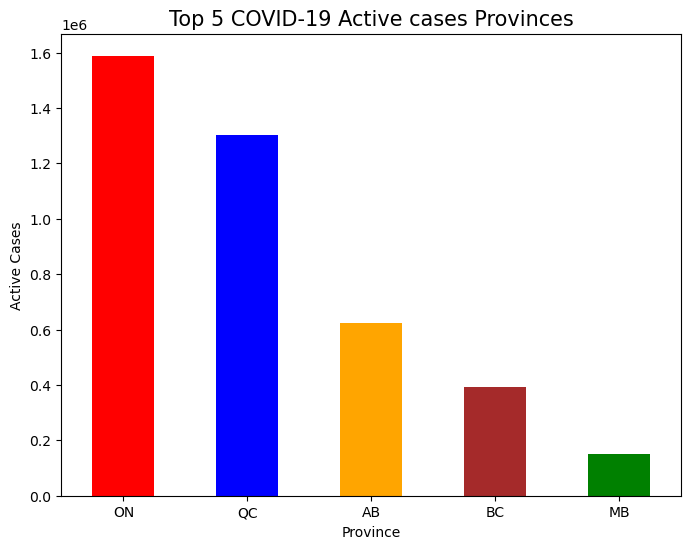

In [23]:
# set the colors for the bars
colors = ['red', 'blue', 'orange', 'brown', 'green']
ax = top_5_active_province.plot(kind='bar', figsize=(8,6), color = colors, rot=0)
# set the axis labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Active Cases')
ax.set_title("Top 5 COVID-19 Active cases Provinces", size = 15)
ax.set_yscale('linear')
# display the plot
plt.show()

# Top 5 Provinces with highest Covid-19 Deaths

In [24]:
Death_province = covid_dataframe_df.groupby('Province').max()[['Cumulative death cases', 'Date']].sort_values(['Cumulative death cases'], ascending = False).reset_index()
Death_province = Death_province.iloc[0:5]
# Death_province_df = Death_province.set_index('Province')
Death_province_df = Death_province.set_index('Province')['Cumulative death cases']
Death_province_df

Province
QC    18181
ON    16351
AB     5643
BC     5339
MB     2470
Name: Cumulative death cases, dtype: int64

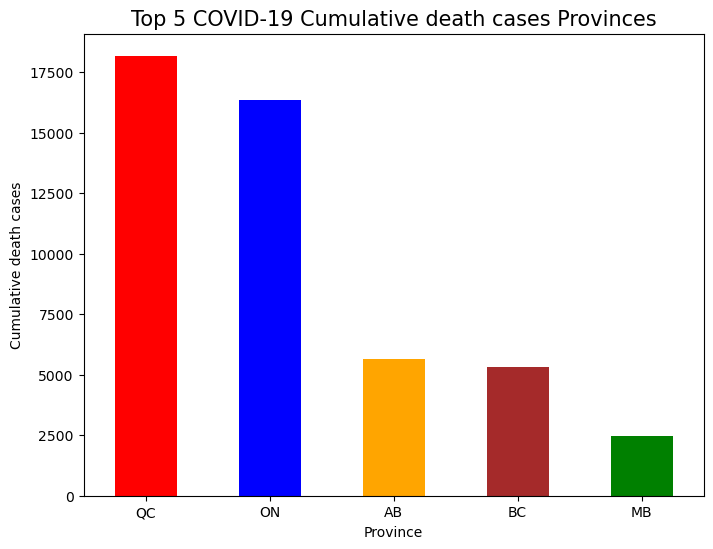

In [25]:
# set the colors for the bars
colors = ['red', 'blue', 'orange', 'brown', 'green']
ax = Death_province_df.plot(kind='bar', figsize=(8,6), color = colors, rot=0)
# set the axis labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Cumulative death cases')
ax.set_title("Top 5 COVID-19 Cumulative death cases Provinces", size = 15)
ax.set_yscale('linear')
# display the plot
plt.show()

# Confirmed cases per day by province

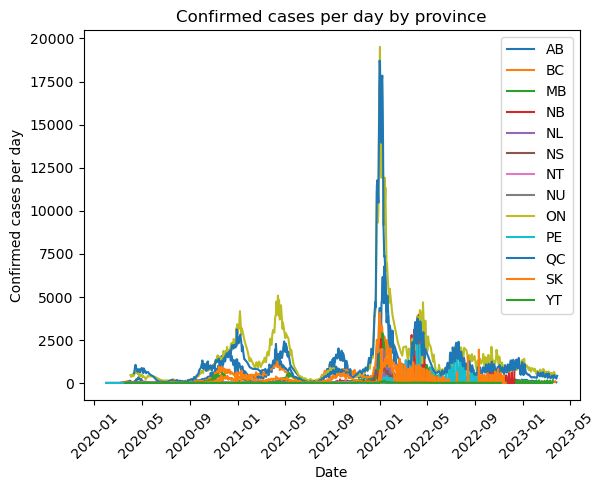

In [26]:
Line_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Confirmed cases per day']]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by province')
plt.legend()
# show the plot
plt.show()

# Confirmed cases per day by top three provinces

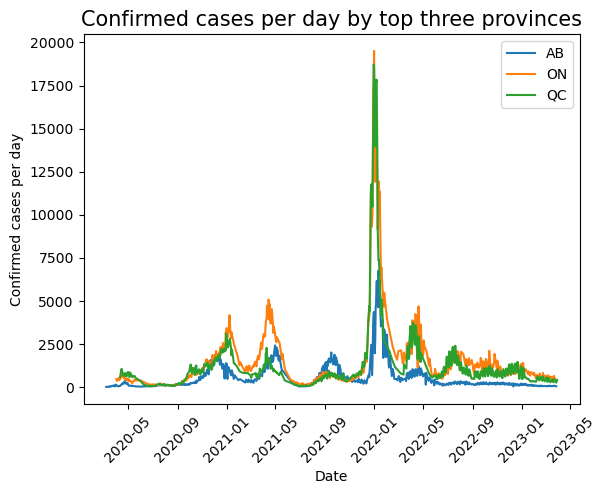

In [27]:
# calculate total confirmed cases for each province
totals = Line_plot_df.groupby('Province')['Confirmed cases per day'].sum().reset_index()
# sort by total confirmed cases and select top five provinces
top_three = totals.sort_values('Confirmed cases per day', ascending=False).head(3)['Province']
# filter dataframe to only include top five provinces
Line_plot_df = Line_plot_df[Line_plot_df['Province'].isin(top_three)]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by top three provinces', size = 15)
plt.legend()
# show the plot
plt.show()

# Confirmed cases per day by Individual provinces 

Enter desired provinces separated by commas: ON


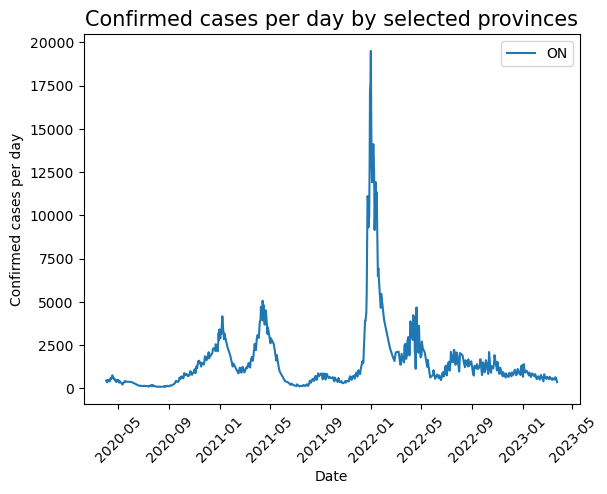

In [28]:
# allow user to input desired provinces
provinces = input("Enter desired provinces separated by commas: ").split(",")
# filter dataframe to only include desired provinces
Line_plot_df = Line_plot_df[Line_plot_df['Province'].isin(provinces)]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by selected provinces', size =15)
plt.legend()
# show the plot
plt.show()

# Cumulative confirmed cases by top three provinces

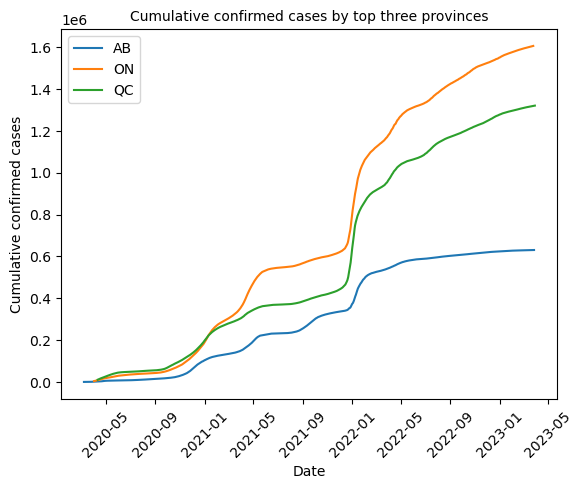

In [30]:
# calculate Cumulative confirmed cases confirmed cases for each province
cumulative_Line_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Cumulative confirmed cases']]
# sort by province and date
cumulative_Line_plot_df = cumulative_Line_plot_df.sort_values(['Province', 'Date'])
totals = cumulative_Line_plot_df.groupby('Province')['Cumulative confirmed cases'].sum().reset_index()
# sort by Cumulative confirmed cases and select top three provinces
top_three = totals.sort_values('Cumulative confirmed cases', ascending=False).head(3)['Province']
# filter dataframe to only include top three provinces
cumulative_Line_plot_df = cumulative_Line_plot_df[cumulative_Line_plot_df['Province'].isin(top_three)]
# sort by province and date
cumulative_Line_plot_df = cumulative_Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in cumulative_Line_plot_df.groupby('Province'):
    # plot Date vs Cumulative confirmed cases
    plt.plot(group['Date'], group['Cumulative confirmed cases'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Cumulative confirmed cases')
plt.yscale('linear')
plt.title('Cumulative confirmed cases by top three provinces', size = 10)
plt.legend()
# show the plot
plt.show()